<a href="https://colab.research.google.com/github/Lutris98/Cheatsheets/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import pandas as pd
from datetime import datetime
from google.colab import drive
drive.mount('/content/gdrive')
parser=lambda x:datetime.strptime(x,'%m/%d/%Y') #보통 서양식 날짜 표기법(연도만 맨뒤로)
df=pd.read_csv('/content/gdrive/MyDrive/Dataset/manualoa_tsa.csv',parse_dates=['DATE'],date_parser=parser)
df.index=df.DATE
df.drop('DATE',axis=1,inplace=True)
df.info()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2014-01-01 to 2018-12-30
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MinTemp  1821 non-null   float64
 1   MaxTemp  1821 non-null   float64
 2   AvgTemp  1821 non-null   float64
 3   Sunrise  1825 non-null   int64  
 4   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 85.5 KB


In [170]:
df.dropna(inplace=True) #시계열 분석에 null값 안됨

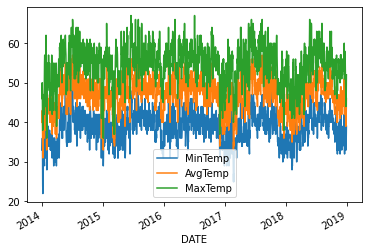

In [171]:
df[['MinTemp','AvgTemp','MaxTemp']].plot().autoscale() #resample/shift/rolling/expanding참고

In [172]:
df.resample('M').mean() #시이발 frequency 설정 존나 안되네
df.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', name='DATE', length=1821, freq=None)

#MA
Simple은 ewma랑 똑같음 
Linear할 때 add, Exponential할 때 mul

In [173]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
train_df,test_df=df.iloc[:1600],df.iloc[1600:]
df['Simple']=df.AvgTemp.ewm(span=12).mean() #default로 (1-alpha)^i,alpha=2/(span+1) #adjust=False하면 복잡
double_model=ExponentialSmoothing(train_df['AvgTemp'],trend='add').fit()
triple_model=ExponentialSmoothing(train_df['AvgTemp'],trend='add',seasonal='add',seasonal_periods=360).fit() #season은 몇 freq인가 #판단이 더 어려워서 metric으로 
df['Double']=double_model.fittedvalues
df['Triple']=triple_model.fittedvalues

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [174]:
print(df.index.freq)

None


In [175]:
import matplotlib.pyplot as plt
double_predict=double_model.forecast(200) #train한 데이터 이후 몇 freq
triple_predict=triple_model.forecast(200)
double_predict

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


1600    49.983392
1601    49.989588
1602    49.995784
1603    50.001981
1604    50.008177
          ...    
1795    51.191682
1796    51.197879
1797    51.204075
1798    51.210271
1799    51.216468
Length: 200, dtype: float64

In [176]:
df.Double.plot(label='DoubleEWMA')
double_predict.plot(label='Forecast')
plt.legend(loc='best')

ValueError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f7d29759950> (for post_execute):


ValueError: ignored

ValueError: ignored

#I
stationary하게 준비하는 방법

#AR

#1. ARMA(p,q) & ARIMA(p,d,q)

#2. SARIMA(p,d,q)(P,D,Q)m & SARIMAX

#3. VAR(p) & VARMA(p,q)